### IMPORTING  LIBRARIES (Pre-processing)

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### EDA

In [77]:
df=pd.read_csv("desktop/py_files/data/framingham.csv")
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [78]:
df.shape

(4238, 16)

In [79]:
df.info() #checking data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [80]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [81]:
#handling null values

#replacing nan values of education and glucose column with mean value.
edu_mean=df.education.mean()
glu_mean=df.glucose.mean()
df.education.fillna(edu_mean,axis=0,inplace=True)
df.education.fillna(glu_mean,axis=0,inplace=True)

In [82]:
df.dropna(inplace=True)

In [83]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [84]:
#no null values present in our data set.

## VISUALIZATIONS

<AxesSubplot:>

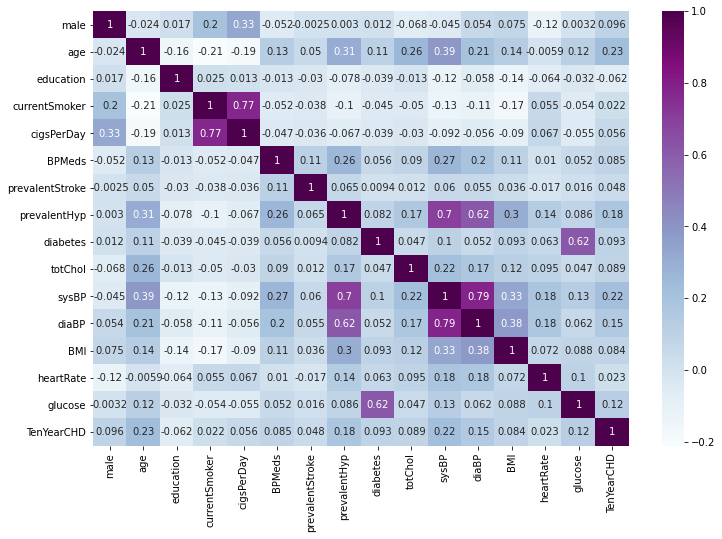

In [85]:
# checking the relation amongst our variables

fig=plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap="BuPu")


In [86]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


Distribution of continuous variables


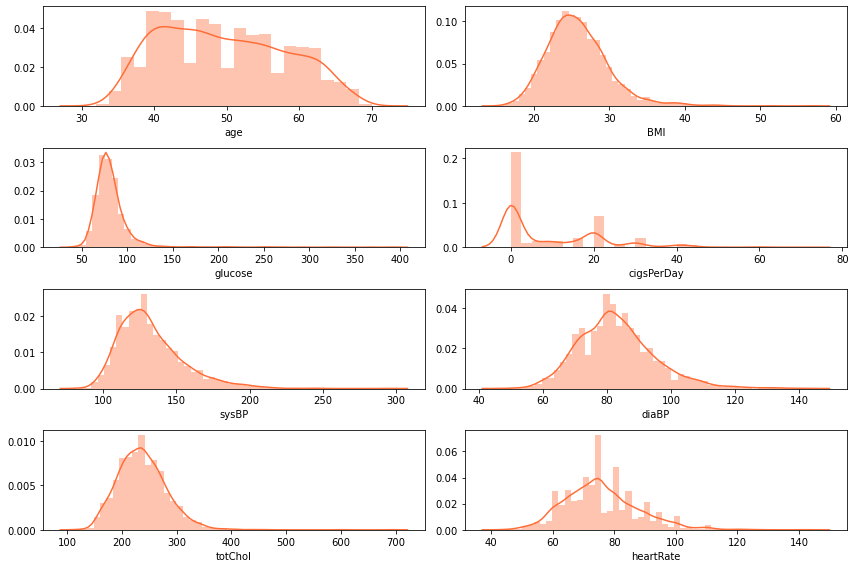

In [87]:
#distribution of our variables

print("Distribution of continuous variables")
fig,axes = plt.subplots(nrows=4,ncols=2,figsize=(12,8))
sns.distplot(df.age,ax=axes[0,0])
sns.distplot(df.BMI,ax=axes[0,1])
sns.distplot(df.glucose,ax=axes[1,0])
sns.distplot(df.cigsPerDay,ax=axes[1,1])
sns.distplot(df.sysBP,ax=axes[2,0])
sns.distplot(df.diaBP,ax=axes[2,1])
sns.distplot(df.totChol,ax=axes[3,0])
sns.distplot(df.heartRate,ax=axes[3,1])
plt.tight_layout()


Text(0.5, 0, 'Categories of smokers')

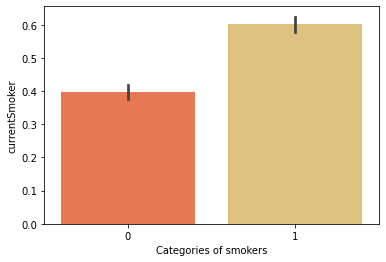

In [88]:
#male/female vs currentSmoker
sns.set_palette("rainbow_r")
sns.barplot(df.male,df.currentSmoker)
plt.xlabel("Categories of smokers")

In [89]:
#we can see in our data set that there are more male smokers than female smokers

<AxesSubplot:xlabel='age', ylabel='count'>

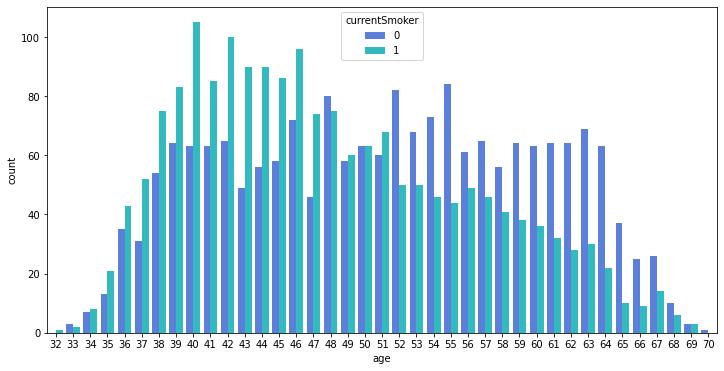

In [90]:
#age vs currentSmoker
plt.subplots(figsize=(12,6))
sns.set_palette("turbo")
sns.countplot(df.age,hue=df.currentSmoker)

In [91]:
#we can see as age increases current smoker decreases

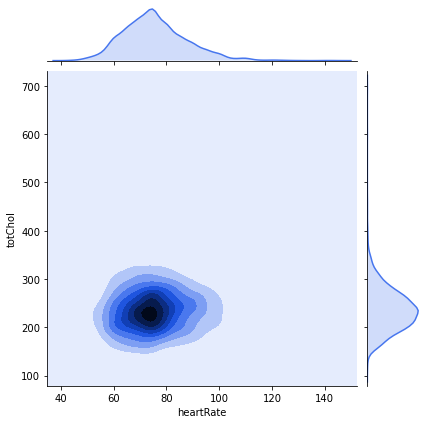

In [92]:
#heartRate vs choles
sns.jointplot(df.heartRate,df.totChol,kind="kde")

In [93]:
#we can see the sweet spot where heartRate is related to Cholesterol

### Creating Models

In [109]:
#creating basic model (Logistic_Regression)

In [96]:
#dividing our data set
y=df.iloc[:,-1]
x=df.drop("TenYearCHD",axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import cross_val_score
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print("Model Score is:",logmodel.score(X_test,y_test))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91       625
           1       0.36      0.03      0.06       125

    accuracy                           0.83       750
   macro avg       0.60      0.51      0.48       750
weighted avg       0.76      0.83      0.76       750

[[618   7]
 [121   4]]
Model Score is: 0.8293333333333334


c:\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [107]:
#applying hyperparameter tuning over our models

In [108]:
from sklearn.model_selection import GridSearchCV
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]
reg1 = GridSearchCV(logmodel, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)
reg2=reg1.fit(X_train,y_train)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   22.2s
[Parallel(n_jobs=-1)]: Done 884 tasks      | elapsed:   56.5s
[Parallel(n_jobs=-1)]: Done 1423 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 2075 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 2792 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 3671 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 4733 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done 4800 out of 4800 | elapsed: 11.5min finished


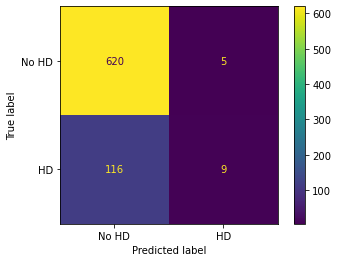

In [110]:
#plotting confusion matrix of our tuned model
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(reg2,
                     X_test,
                     y_test,
                     values_format='d',
                     display_labels=["No HD","HD"])

In [111]:
print("Model score after HP Tuning is:",reg2.score(X_test,y_test))

Model score after HP Tuning is: 0.8386666666666667


In [ ]:
#We can see that our model score increased by one perecent after tuning it.

In [ ]:
Though our model has given a reasonably good score of 84% , still from the confusion matrix plot 
we can clearly conclude that it is a bit biased model. 
Our data set has more people without HD than with HD. So, our model is clearly claasifing the people without HD,
but it is giving a horrible score for people with HD.

In future we will try other classification techniques to improve our overall score and also

## END